In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
ATTACK_TARGET = "02"
MAIN = False # True: メインの攻撃, False: 予備選の攻撃

DIR = "../data" if MAIN else "../predata/anonymization_data"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [3]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### Cデータの読み取り

In [4]:
from os import listdir

#c0~c9に対するdfのリスト
c_data_list = []

files = listdir(DIR)

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    c_data = pd.read_csv(f"{DIR}/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,2628,2872,3438,3439,3440,3877,3889
0,F,18,4,84,2,1,2,1,1,5,0,2,5,2,1,1,3
1,M,1,4,396,5,5,1,5,2,5,0,3,0,4,0,1,0
2,M,35,7,274,4,3,0,5,4,1,3,2,5,1,3,4,3
3,F,45,20,282,3,0,0,0,1,0,0,0,0,4,0,0,0
4,F,45,13,312,3,1,3,5,2,2,5,3,1,3,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,25,15,301,3,0,0,0,0,4,4,4,5,0,1,2,0
9996,F,35,18,940,3,0,0,0,5,4,3,0,0,3,0,0,5
9997,M,45,8,837,5,0,2,0,0,0,2,3,0,0,0,1,3
9998,M,18,9,201,2,4,0,2,0,0,0,0,3,0,0,0,0


### Ba, Bbの読み込み

In [5]:
Ba = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}a.csv")
Ba.head()

,Name,Gender,Age,Occupation,ZIP-code
0,Florie Lintall,F,18,17,373
1,Ring Delouch,M,50,12,826
2,Christos Morkham,M,50,0,180
3,Wye Zanutti,M,18,12,307
4,De witt Kertess,M,35,17,452


In [6]:
Bb = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}b.csv")
Bb.head()

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,3,0,2,1,0,3,0,2,0,2,...,1,2,3,4,0,2,0,3,5,2
1,0,0,2,1,3,2,3,0,1,2,...,2,0,4,0,5,0,0,0,0,4
2,0,1,0,1,1,1,0,0,4,0,...,4,0,0,0,0,0,2,5,0,0
3,0,0,1,5,0,1,0,2,0,0,...,3,0,3,0,*,0,0,5,3,5
4,3,0,0,5,0,0,0,4,0,4,...,4,0,2,0,3,0,2,0,0,0


### 攻撃に利用するGAOZと映画のIDの全ペア

In [7]:
cross_tab_pairs = []

for gaoz_header in B_USER_ATTRIBUTE_HEADERS:
    for movie_id in MOVIE_IDS:
        cross_tab_pairs.append((gaoz_header, movie_id))

cross_tab_pairs[:4]

[('Gender', '2'), ('Gender', '56'), ('Gender', '247'), ('Gender', '260')]

### C0~C9の各cross集計の平均をとる

In [8]:
# 1. c0からc9までのデータを結合
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)


# 2. cross_tab_pairsごとにクロス集計を行う
cross_tabs = {}
for gaoz_header, movie_id in cross_tab_pairs:
    cross_tab = pd.crosstab(combined_data[gaoz_header], combined_data[movie_id], normalize='all')
    cross_tabs[(gaoz_header, movie_id)] = cross_tab

cross_tabs[cross_tab_pairs[3]]

260,0,1,2,3,4,5
Gender,,,,,,
F,0.035600,0.047175,0.036550,0.0635,0.05890,0.120275
M,0.063125,0.078125,0.057725,0.0994,0.10425,0.235375


### C0~C9の各cross集計の平均の可視化

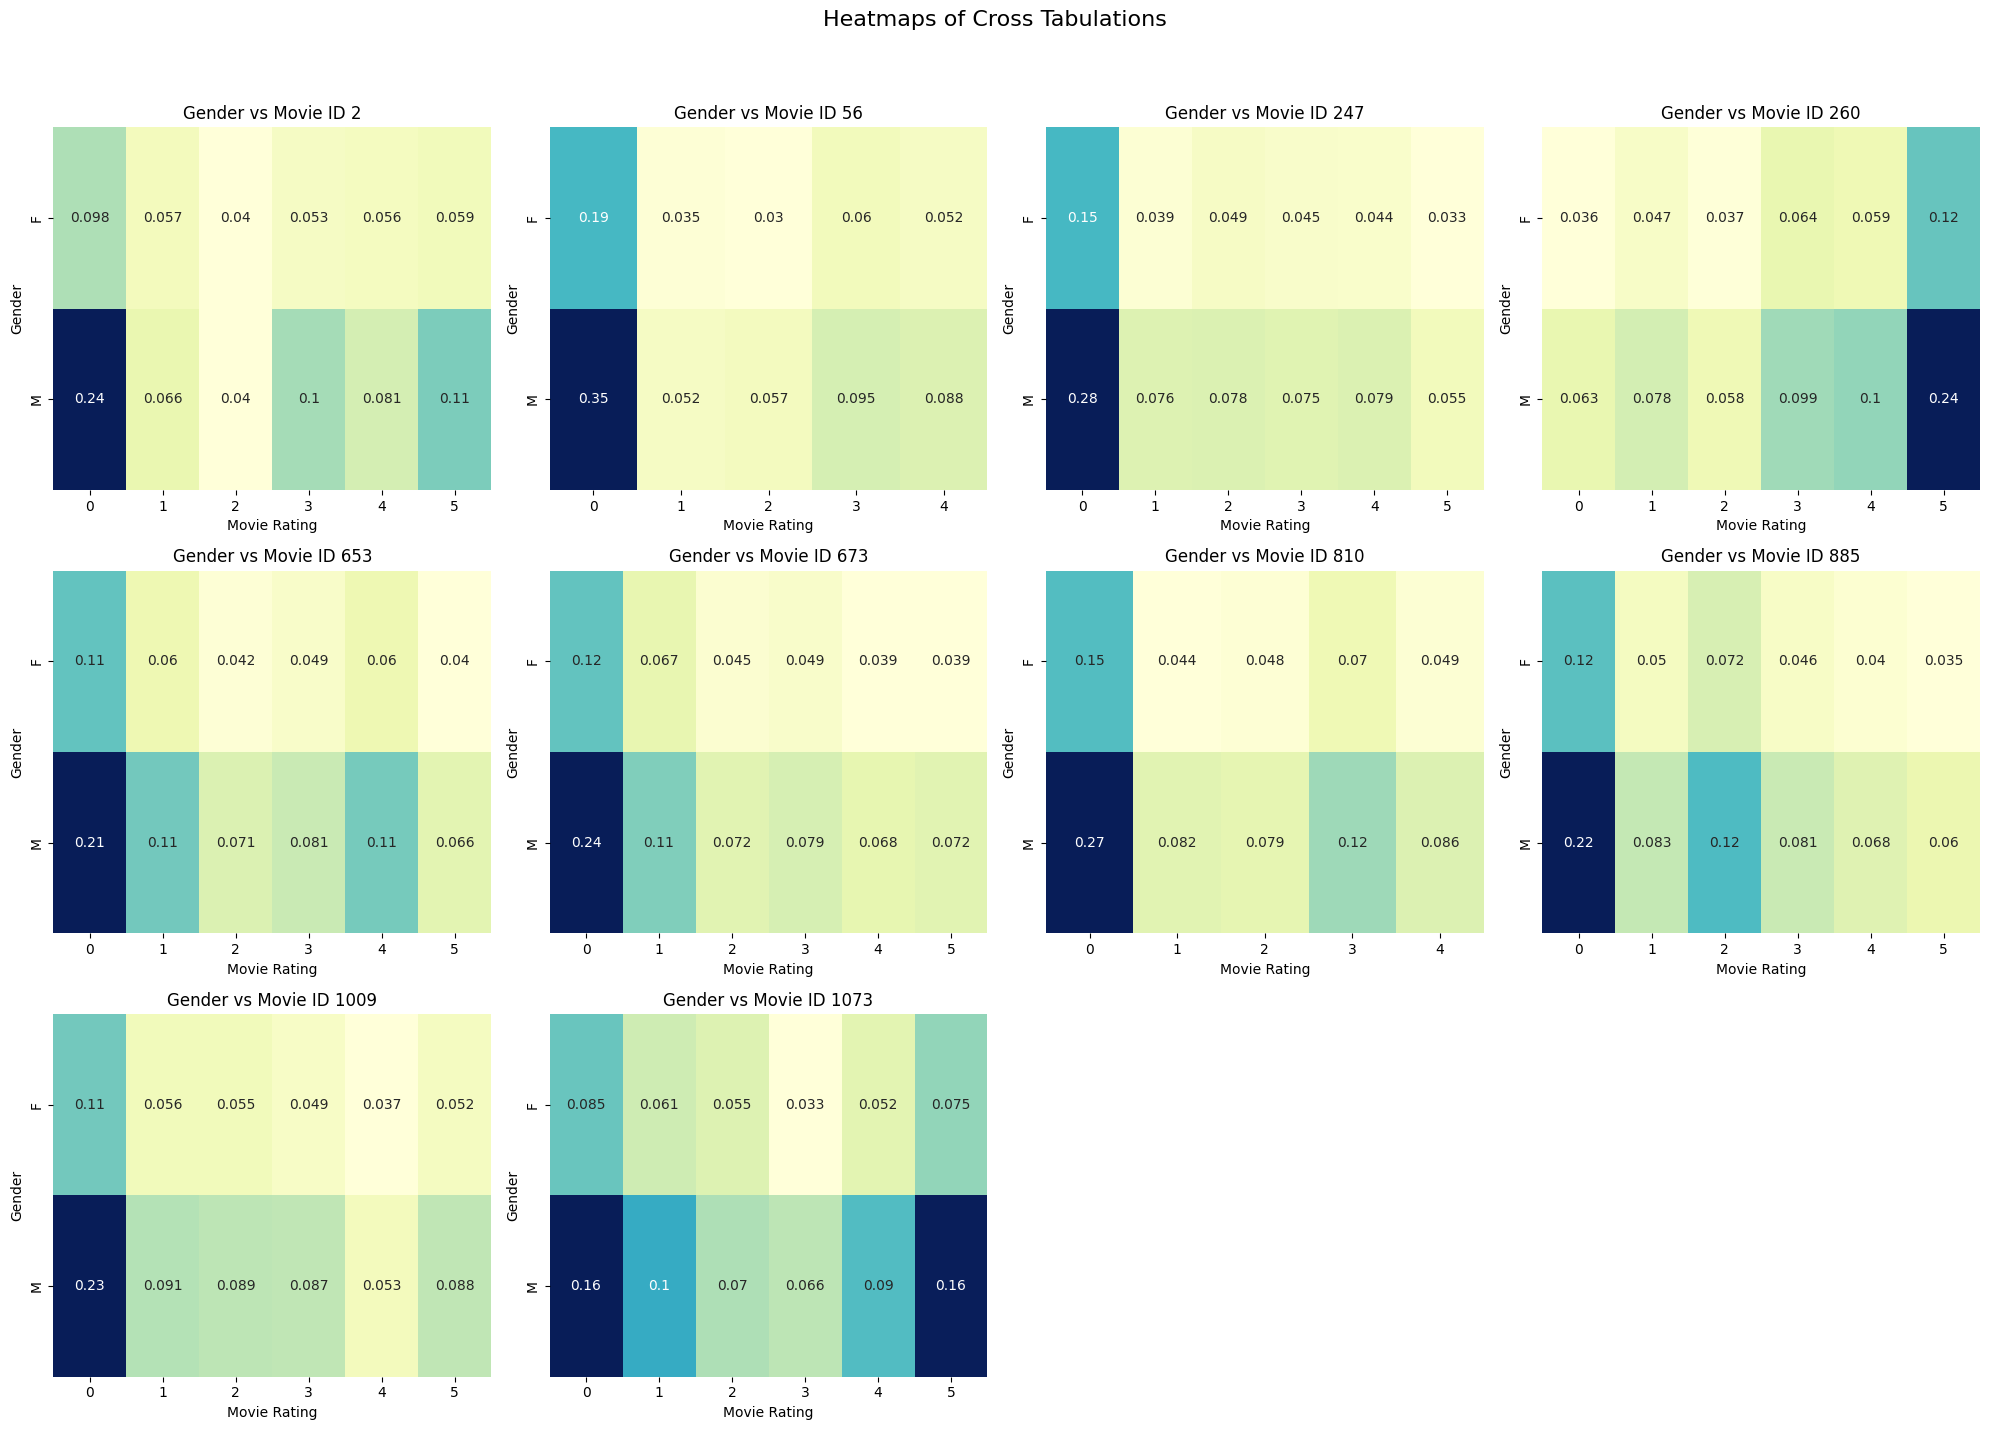

Total number of cross tabulations: 184


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmaps(cross_tabs, num_plots=12):
    num_rows = (num_plots + 3) // 4  # 4列で表示するために必要な行数を計算
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    fig.suptitle("Heatmaps of Cross Tabulations", fontsize=16)

    for i, ((gaoz_header, movie_id), cross_tab) in enumerate(list(cross_tabs.items())[:num_plots]):
        row = i // 4
        col = i % 4
        ax = axes[row, col]
        sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', ax=ax, cbar=False)
        ax.set_title(f"{gaoz_header} vs Movie ID {movie_id}")
        ax.set_ylabel(gaoz_header)
        ax.set_xlabel("Movie Rating")

    # 使用していない subplot を削除
    for i in range(num_plots, num_rows * 4):
        row = i // 4
        col = i % 4
        fig.delaxes(axes[row, col])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # suptitle のためのスペースを確保
    plt.show()

# 最初の20個のクロス集計表とそのヒートマップを表示
plot_heatmaps(cross_tabs, num_plots=10)

# クロス集計表の数を表示
print(f"Total number of cross tabulations: {len(cross_tabs)}")

### GAOZの各要素を一様分布にするように、正規化を施す

MEMO: Heatmapの各行の合計値が 1/[カラムごとの種類数]になる

In [10]:
def normalize_gaoz_categories(cross_tab):
    # 各カテゴリの重みを計算（全て等しくなるように）
    category_weight = 1 / len(cross_tab)
    # 各行を正規化し、カテゴリの重みを適用
    normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0) * category_weight
    return normalized

# 全てのクロス集計表に対して新しい正規化を適用
normalized_cross_tabs = {}
for key, cross_tab in cross_tabs.items():
    normalized_cross_tabs[key] = normalize_gaoz_categories(cross_tab)

normalize_gaoz_categories(cross_tabs[cross_tab_pairs[0]])

2,0,1,2,3,4,5
Gender,,,,,,
F,0.135221,0.078591,0.055110,0.073273,0.076796,0.081008
M,0.184875,0.052077,0.031583,0.078723,0.063088,0.089655


#### 各行が同じになっていることを念の為確認する

In [11]:
print(normalize_gaoz_categories(cross_tabs[cross_tab_pairs[1]]).sum(axis=1))
print(normalize_gaoz_categories(cross_tabs[cross_tab_pairs[50]]).sum(axis=1))

Gender
F    0.5
M    0.5
dtype: float64
Age
1     0.142857
18    0.142857
25    0.142857
35    0.142857
45    0.142857
50    0.142857
56    0.142857
dtype: float64


### 正規化後のHeatmapを表示

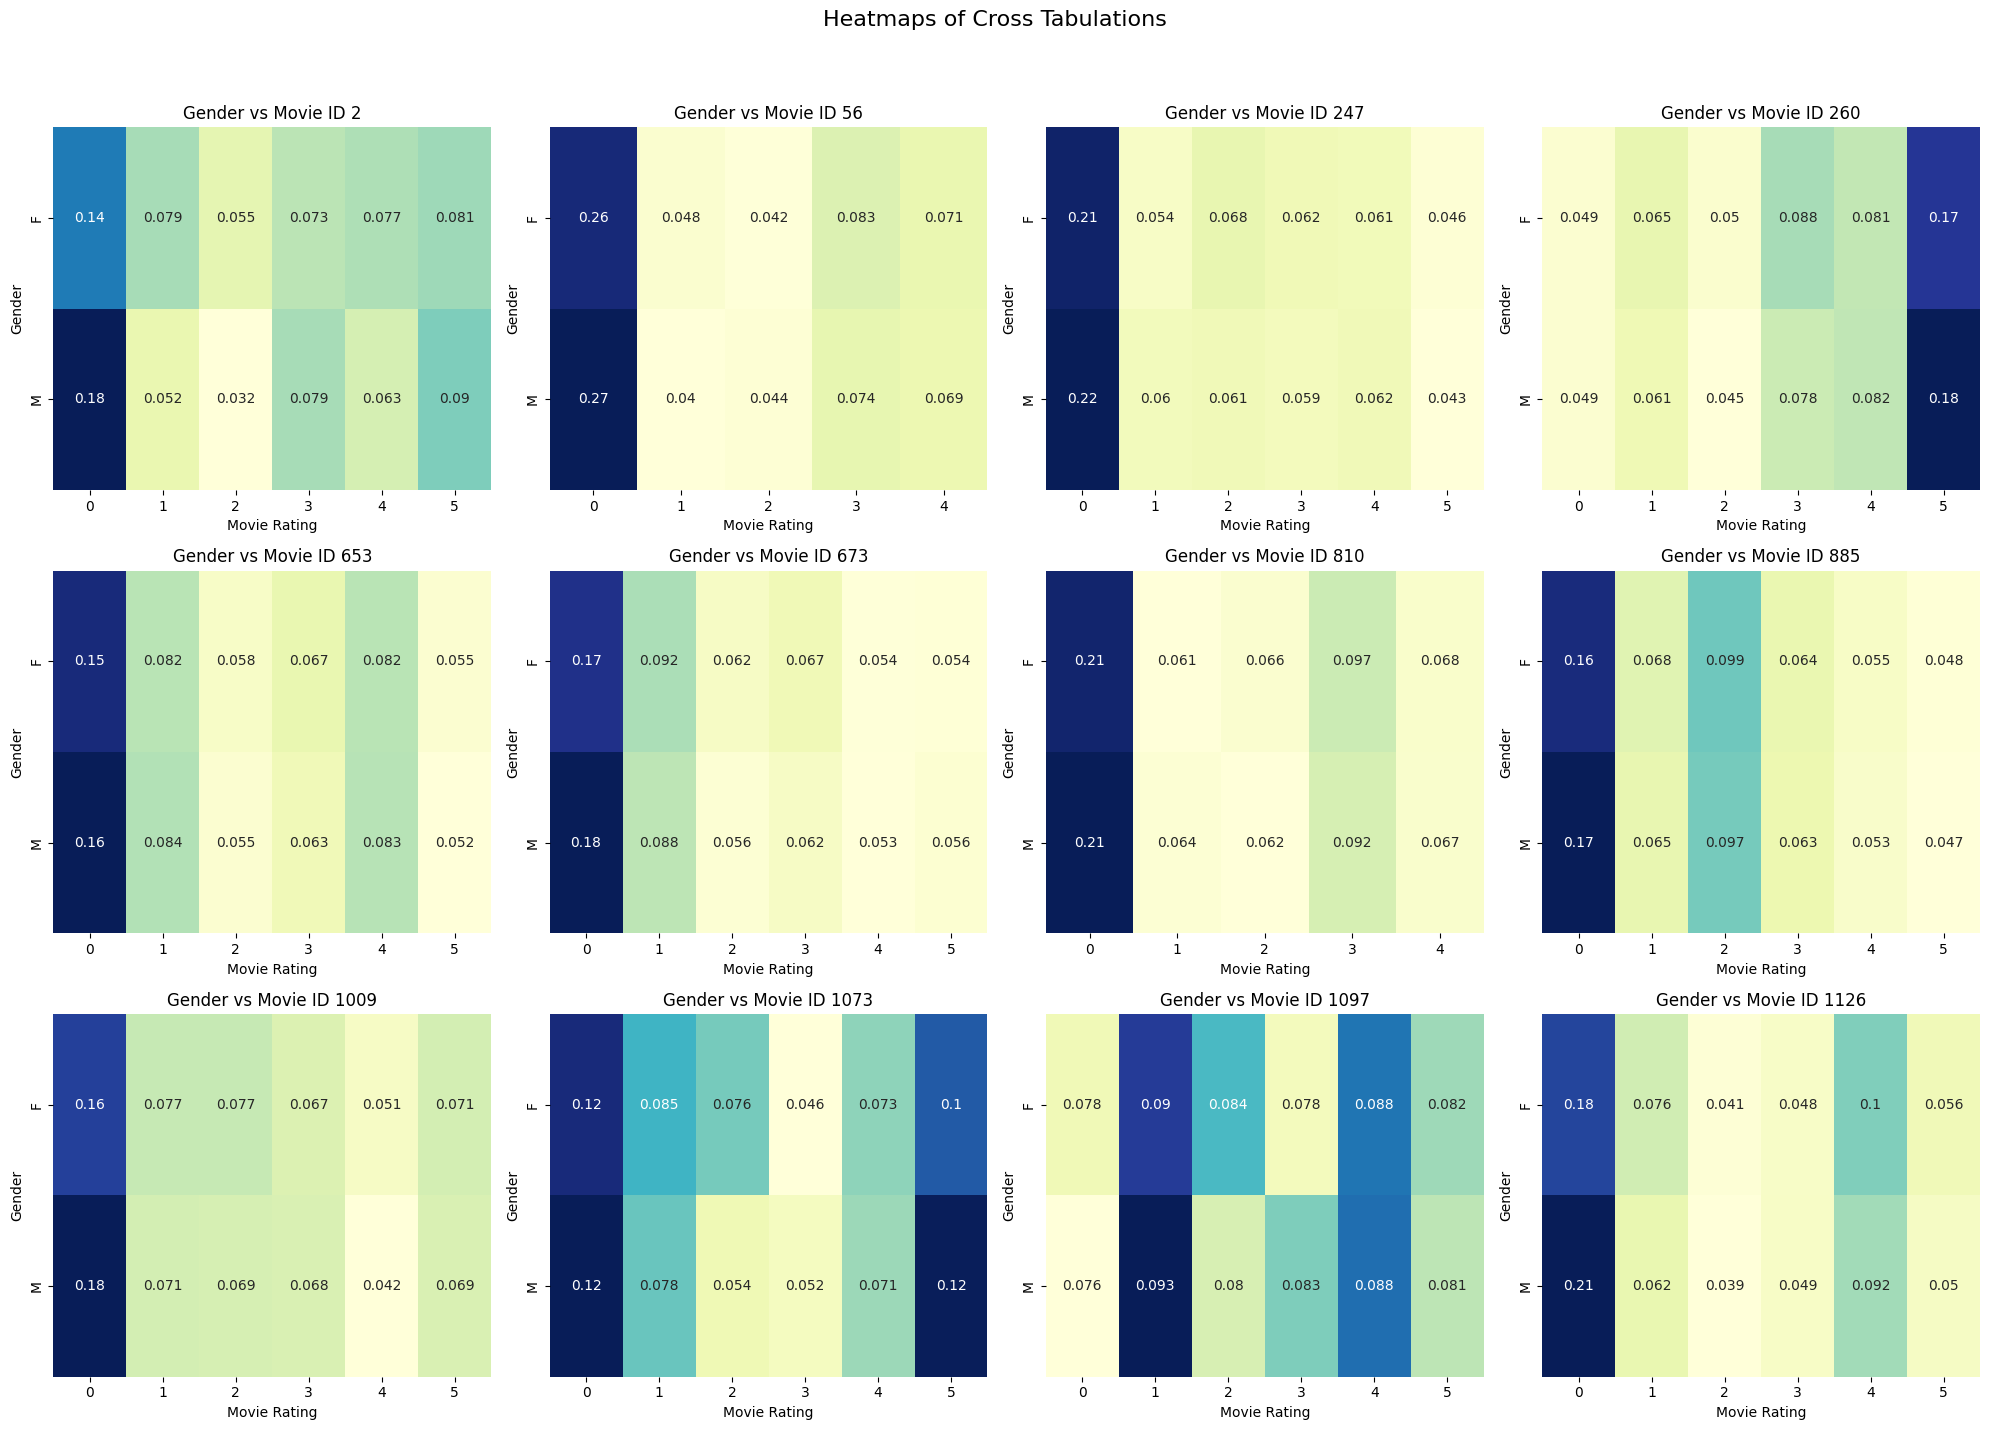

In [12]:
plot_heatmaps(normalized_cross_tabs, num_plots=12)

### Bbの特定の行の各映画のReviewごとのGAOZの確率の試算

In [13]:
# Bbの指定した行を取得
target_Bb_row_index = 8
target_Bb_row = Bb.iloc[target_Bb_row_index]
target_Bb_row[:5]

2      5
56     3
247    2
260    2
653    4
Name: 8, dtype: object

In [14]:
target_gaoz = "ZIP-code" # "Age" | "Occupation" | "ZIP-code"

# 各映画IDに対する target_cross を格納するリスト
target_BB_row_cross_tabs = []

for movie_id in MOVIE_IDS:
    cross_tab = normalized_cross_tabs[(target_gaoz, movie_id)]
    # Bbの対象行の映画の評価値を取得
    bb_review_value_for_selected_movie = target_Bb_row[movie_id]
    if bb_review_value_for_selected_movie == "*":
        continue
    target_cross_tab = cross_tab[int(bb_review_value_for_selected_movie)]
    target_BB_row_cross_tabs.append(target_cross_tab)

target_BB_row_cross_tabs = pd.concat(target_BB_row_cross_tabs, axis=1)
target_BB_row_cross_tabs

,5,3,2,2,4,3,0,2,2,0,...,2,0,0,4,0,4,2,2,3,3
ZIP-code,,,,,,,,,,,,,,,,,,,,,
6,0.000466,0.000233,0.000000,0.000000,0.000233,0.000155,0.000855,0.000000,0.000311,0.000699,...,0.000311,0.000777,0.000699,0.000311,0.001321,0.000622,0.000155,0.000311,0.000155,0.000155
10,0.000505,0.000463,0.000533,0.000084,0.000337,0.000253,0.000842,0.000379,0.000421,0.000274,...,0.000365,0.000842,0.000505,0.000295,0.001136,0.000589,0.000253,0.000168,0.000084,0.000295
12,0.000367,0.000275,0.000551,0.000000,0.000367,0.000367,0.001102,0.000826,0.000275,0.000367,...,0.000245,0.000735,0.000551,0.000000,0.001377,0.000184,0.000092,0.000000,0.000459,0.000367
13,0.000289,0.000433,0.000289,0.000577,0.000577,0.000072,0.000000,0.000000,0.001154,0.000649,...,0.000577,0.000577,0.000433,0.000000,0.001443,0.000289,0.000722,0.000000,0.000144,0.000000
15,0.000202,0.000606,0.000058,0.000144,0.000433,0.000216,0.001068,0.000260,0.000202,0.000404,...,0.000423,0.000462,0.000664,0.000375,0.001039,0.000346,0.000231,0.000289,0.000260,0.000404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.000471,0.000135,0.000269,0.000135,0.000135,0.000303,0.000808,0.000404,0.000269,0.000269,...,0.000180,0.000539,0.001145,0.000135,0.001212,0.000135,0.000135,0.000404,0.000404,0.000337
991,0.000404,0.000404,0.000370,0.000404,0.000354,0.000379,0.000808,0.000404,0.000303,0.000354,...,0.000471,0.001010,0.000606,0.000404,0.001061,0.000404,0.000152,0.000505,0.000152,0.000455
992,0.000101,0.000303,0.000101,0.000354,0.000455,0.000404,0.000758,0.000556,0.000303,0.000379,...,0.000404,0.000606,0.000455,0.000303,0.001010,0.000404,0.000202,0.000404,0.000455,0.000455


In [15]:
# 各カラムごとに総和が1になるように確率を正規化
def normalize_columns(df):
    return df.div(df.sum(axis=0), axis=1)

# クロス集計表を列ごとに正規化
normalized_target_BB_row_cross_tabs = normalize_columns(target_BB_row_cross_tabs)
normalized_target_BB_row_cross_tabs

,5,3,2,2,4,3,0,2,2,0,...,2,0,0,4,0,4,2,2,3,3
ZIP-code,,,,,,,,,,,,,,,,,,,,,
6,0.002741,0.001478,0.000000,0.000000,0.001413,0.001186,0.002041,0.000000,0.002146,0.002954,...,0.002002,0.001801,0.001735,0.002101,0.002188,0.004574,0.002101,0.001977,0.001495,0.001225
10,0.002969,0.002935,0.004149,0.000846,0.002040,0.001926,0.002010,0.001922,0.002906,0.001156,...,0.002350,0.001951,0.001253,0.001991,0.001882,0.004336,0.003414,0.001071,0.000810,0.002322
12,0.002159,0.001746,0.004288,0.000000,0.002226,0.002802,0.002632,0.004195,0.001902,0.001552,...,0.001578,0.001703,0.001367,0.000000,0.002282,0.001351,0.001241,0.000000,0.004416,0.002895
13,0.001697,0.002744,0.002246,0.005799,0.003498,0.000550,0.000000,0.000000,0.007971,0.002743,...,0.003719,0.001338,0.001074,0.000000,0.002390,0.002124,0.009754,0.000000,0.001388,0.000000
15,0.001188,0.003842,0.000449,0.001450,0.002623,0.001651,0.002550,0.001318,0.001395,0.001707,...,0.002727,0.001070,0.001647,0.002536,0.001721,0.002548,0.003121,0.001836,0.002498,0.003184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.002771,0.000854,0.002096,0.001353,0.000816,0.002312,0.001930,0.002051,0.001860,0.001138,...,0.001157,0.001249,0.002841,0.000910,0.002008,0.000991,0.001821,0.002570,0.003886,0.002654
991,0.002375,0.002561,0.002882,0.004060,0.002143,0.002890,0.001930,0.002051,0.002092,0.001494,...,0.003037,0.002341,0.001504,0.002731,0.001757,0.002973,0.002048,0.003212,0.001457,0.003582
992,0.000594,0.001921,0.000786,0.003552,0.002755,0.003082,0.001809,0.002820,0.002092,0.001600,...,0.002603,0.001405,0.001128,0.002048,0.001673,0.002973,0.002731,0.002570,0.004372,0.003582


In [16]:
# TODO: ここがSUMでいいのかは要検討
target_BB_row_probabilities = normalized_target_BB_row_cross_tabs.sum(axis=1)
target_BB_row_probabilities.sort_values(ascending=True)

ZIP-code
121    0.067822
149    0.068109
520    0.070056
79     0.070784
503    0.070824
         ...   
803    0.113895
680    0.115539
916    0.115810
975    0.115969
284    0.125572
Length: 495, dtype: float64

In [17]:
# 確率が合計で1になるように正規化
total_prob = target_BB_row_probabilities.sum()
normalized_target_BB_row_probabilities = target_BB_row_probabilities / total_prob
normalized_target_BB_row_probabilities.sort_values(ascending=False)

ZIP-code
284    0.002790
975    0.002577
916    0.002574
680    0.002568
803    0.002531
         ...   
503    0.001574
79     0.001573
520    0.001557
149    0.001514
121    0.001507
Length: 495, dtype: float64

### 上はGAOZのうちの一つであったが、GAOZそれぞれの確率を取れるようにする

In [18]:
target_Bb_row_index = 0
target_Bb_row = Bb.iloc[target_Bb_row_index]

In [19]:
gaoz_probabilities = {}

for target_gaoz in B_USER_ATTRIBUTE_HEADERS:
    # 各映画IDに対する target_cross を格納するリスト
    target_BB_row_cross_tabs = []

    for movie_id in MOVIE_IDS:
        cross_tab = normalized_cross_tabs[(target_gaoz, movie_id)]
        # Bbの対象行の映画の評価値を取得
        bb_review_value_for_selected_movie = target_Bb_row[movie_id]
        if bb_review_value_for_selected_movie == "*":
            continue
        target_cross_tab = cross_tab[int(bb_review_value_for_selected_movie)]
        target_BB_row_cross_tabs.append(target_cross_tab)

    target_BB_row_cross_tabs = pd.concat(target_BB_row_cross_tabs, axis=1)

    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_target_BB_row_cross_tabs = normalize_columns(target_BB_row_cross_tabs)

    target_BB_row_probabilities = normalized_target_BB_row_cross_tabs.sum(axis=1)

    total_prob = target_BB_row_probabilities.sum()
    normalized_target_BB_row_probabilities = target_BB_row_probabilities / total_prob

    gaoz_probabilities[target_gaoz] = normalized_target_BB_row_probabilities

gaoz_probabilities

{'Gender': Gender
 F    0.49647
 M    0.50353
 dtype: float64,
 'Age': Age
 1     0.145312
 18    0.143587
 25    0.141482
 35    0.137996
 45    0.142171
 50    0.145324
 56    0.144128
 dtype: float64,
 'Occupation': Occupation
 0     0.048663
 1     0.047768
 2     0.046688
 3     0.048048
 4     0.046352
 5     0.044735
 6     0.055632
 7     0.047661
 8     0.045518
 9     0.053229
 10    0.046005
 11    0.044605
 12    0.048018
 13    0.050254
 14    0.047639
 15    0.044858
 16    0.047380
 17    0.046151
 18    0.047546
 19    0.045659
 20    0.047594
 dtype: float64,
 'ZIP-code': ZIP-code
 6      0.002110
 10     0.002094
 12     0.002699
 13     0.001858
 15     0.001647
          ...   
 990    0.001809
 991    0.002090
 992    0.002034
 993    0.001764
 997    0.001756
 Length: 495, dtype: float64}

### 上のGAOZごとの確率を参考にしながら、Baのどれなら一番確率が高くなるかを求める

In [20]:
Ba_with_gaoz_prob = Ba[B_USER_ATTRIBUTE_HEADERS].copy()
Ba_with_gaoz_prob["Probability"] = 0.0
Ba_with_gaoz_prob.head(1)

,Gender,Age,Occupation,ZIP-code,Probability
0,F,18,17,373,0.0


In [21]:
def calculate_probability(row):
    prob = 1.0
    for attr in B_USER_ATTRIBUTE_HEADERS:
        attr_value = row[attr]
        prob *= gaoz_probabilities[attr][attr_value]
    return prob

# Ba の各行に対して確率を計算
Ba_with_gaoz_prob['Probability'] = Ba_with_gaoz_prob.apply(calculate_probability, axis=1)
Ba_with_gaoz_prob.sort_values('Probability', ascending=False).head()


,Gender,Age,Occupation,ZIP-code,Probability
31,M,25,9,49,0.000009
49,M,50,6,54,0.000009
10,M,35,15,12,0.000008
1,M,50,12,826,0.000008
41,M,56,16,215,0.000008


In [22]:
def calculate_gaoz_probabilities(target_Bb_row_index):
    target_Bb_row = Bb.iloc[target_Bb_row_index]
    
    gaoz_probabilities = {}
    for target_gaoz in B_USER_ATTRIBUTE_HEADERS:
        target_BB_row_cross_tabs = []
        for movie_id in MOVIE_IDS:
            cross_tab = normalized_cross_tabs[(target_gaoz, movie_id)]
            bb_review_value_for_selected_movie = target_Bb_row[movie_id]
            if bb_review_value_for_selected_movie == "*":
                continue
            target_cross_tab = cross_tab[int(bb_review_value_for_selected_movie)]
            target_BB_row_cross_tabs.append(target_cross_tab)
        
        target_BB_row_cross_tabs = pd.concat(target_BB_row_cross_tabs, axis=1)
        normalized_target_BB_row_cross_tabs = normalize_columns(target_BB_row_cross_tabs)
        target_BB_row_probabilities = normalized_target_BB_row_cross_tabs.sum(axis=1)
        total_prob = target_BB_row_probabilities.sum()
        normalized_target_BB_row_probabilities = target_BB_row_probabilities / total_prob
        gaoz_probabilities[target_gaoz] = normalized_target_BB_row_probabilities
    
    return gaoz_probabilities

def normalize_columns(df):
    return df.div(df.sum(axis=0), axis=1)

def calculate_probability(row):
    prob = 1.0
    for attr in B_USER_ATTRIBUTE_HEADERS:
        attr_value = row[attr]
        prob *= gaoz_probabilities[attr][attr_value]
    return prob

# 上位50個のインデックスを取得
top_indices = []
for index in range(len(Bb)):
    gaoz_probabilities = calculate_gaoz_probabilities(index)
    Ba_with_gaoz_prob = Ba[B_USER_ATTRIBUTE_HEADERS].copy()
    Ba_with_gaoz_prob['Probability'] = Ba_with_gaoz_prob.apply(calculate_probability, axis=1)
    top_indices.extend(Ba_with_gaoz_prob.sort_values('Probability', ascending=False).head().index.tolist())
    if len(set(top_indices)) >= 50:
        break

top_indices = list(dict.fromkeys(top_indices))[:50]  # 重複を削除し、上位50個を保持

# 結果を格納するリスト
results = []

for index in top_indices:
    gaoz_probabilities = calculate_gaoz_probabilities(index)
    Ba_with_gaoz_prob = Ba[B_USER_ATTRIBUTE_HEADERS].copy()
    Ba_with_gaoz_prob['Probability'] = Ba_with_gaoz_prob.apply(calculate_probability, axis=1)
    max_prob_row = Ba_with_gaoz_prob.loc[Ba_with_gaoz_prob['Probability'].idxmax()]
    
    results.append({
        "Index": index,
        "Gender": max_prob_row["Gender"],
        "Age": max_prob_row["Age"],
        "Occupation": max_prob_row["Occupation"],
        "ZIP-code": max_prob_row["ZIP-code"],
        "Probability": max_prob_row["Probability"]
    })

# 結果をDataFrameに変換
results_df = pd.DataFrame(results)
results_df.sort_values("Index")

,Index,Gender,Age,Occupation,ZIP-code,Probability
25,0,M,25,9,49,0.000009
3,1,M,35,18,358,0.000010
33,2,M,25,1,946,0.000010
39,3,M,25,9,49,0.000010
7,4,M,25,1,946,0.000012
41,5,M,1,19,89,0.000012
32,6,M,56,16,215,0.000009
44,7,M,56,16,215,0.000012
31,8,F,56,7,313,0.000008
46,9,M,18,17,100,0.000009


In [23]:
# クロス集計表を作成し、P(評価 | GAOZ属性)を計算
cross_tabs = {}
for gaoz_header, movie_id in cross_tab_pairs:
    cross_tab = pd.crosstab(combined_data[gaoz_header], combined_data[movie_id], normalize='index')
    cross_tabs[(gaoz_header, movie_id)] = cross_tab

# 各GAOZ属性の事前確率を計算
gaoz_priors = {}
for gaoz_header in B_USER_ATTRIBUTE_HEADERS:
    gaoz_priors[gaoz_header] = combined_data[gaoz_header].value_counts(normalize=True)

# Bbの各ユーザーに対して、対数尤度を計算
results = []
for target_Bb_row_index in range(len(Bb)):
    target_Bb_row = Bb.iloc[target_Bb_row_index]
    gaoz_posteriors = {}
    for target_gaoz in B_USER_ATTRIBUTE_HEADERS:
        log_posterior = np.log(gaoz_priors[target_gaoz].copy())
        for movie_id in MOVIE_IDS:
            bb_review_value = target_Bb_row[movie_id]
            if bb_review_value == "*":
                continue
            observed_rating = int(bb_review_value)
            cross_tab = cross_tabs[(target_gaoz, movie_id)]
            for gaoz_category in cross_tab.index:
                P_rating_given_gaoz = cross_tab.loc[gaoz_category].get(observed_rating, 0)
                if P_rating_given_gaoz == 0:
                    P_rating_given_gaoz = 1e-6  # 小さな値を代入
                log_posterior[gaoz_category] += np.log(P_rating_given_gaoz)
        # 対数尤度を指数関数で戻し、正規化
        log_posterior -= log_posterior.max()
        posterior = np.exp(log_posterior)
        posterior /= posterior.sum()
        gaoz_posteriors[target_gaoz] = posterior
    # Baのユーザーと比較して、確率が最大のものを選択
    Ba_probabilities = []
    for idx, ba_row in Ba.iterrows():
        probability = 1.0
        for target_gaoz in B_USER_ATTRIBUTE_HEADERS:
            ba_gaoz_value = ba_row[target_gaoz]
            probability *= gaoz_posteriors[target_gaoz].get(ba_gaoz_value, 0)
        Ba_probabilities.append((idx, probability))
    Ba_probabilities.sort(key=lambda x: x[1], reverse=True)
    top_idx, top_prob = Ba_probabilities[0]
    top_ba_row = Ba.iloc[top_idx]
    results.append({
        "Bb_Index": target_Bb_row_index,
        "Ba_Index": top_idx,
        "Probability": top_prob,
        "Ba_Gender": top_ba_row["Gender"],
        "Ba_Age": top_ba_row["Age"],
        "Ba_Occupation": top_ba_row["Occupation"],
        "Ba_ZIP-code": top_ba_row["ZIP-code"]
    })

# 結果をデータフレームに変換
results_df = pd.DataFrame(results)


In [24]:
results_df.sort_values("Bb_Index", inplace=True)
results_df

,Bb_Index,Ba_Index,Probability,Ba_Gender,Ba_Age,Ba_Occupation,Ba_ZIP-code
0,0,49,9.525429e-04,M,50,6,54
1,1,13,1.308418e-02,M,35,18,358
2,2,26,8.871762e-04,F,25,20,128
3,3,31,3.828729e-03,M,25,9,49
4,4,16,1.082415e-03,M,35,3,534
5,5,23,9.840966e-03,M,1,19,89
6,6,34,4.546001e-07,F,56,4,10
7,7,41,3.085731e-03,M,56,16,215
8,8,33,1.203288e-04,M,45,15,952
9,9,36,1.648760e-02,M,18,17,100


In [25]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(results_df["Ba_Index"])

if not MAIN:
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[0].values

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")


マッチングの成功率: <span style='color:yellow'>39</span> / 50

## ~うまくマッチングができていなくてそのメモ~ -> 💖 10/6に全部うまく行った 💖

ご指摘ありがとうございます。現在のプログラムでは、BaとBbのマッチングがほとんど成功していないとのことですね。また、クロス集計表の例を見ると、各GAOZ属性（Gender、Age、Occupation、ZIP-code）に対する評価の分布が非常に似通っており、評価データが0に偏っていることがわかります。

**結論から申し上げますと、プログラム自体に重大な問題はない可能性が高く、主な原因はデータ自体にあると考えられます。具体的には、映画の評価がGAOZ属性とあまり相関しておらず、各属性間で評価の分布に大きな差異がないため、マッチングがうまくいかない状況です。**

以下に詳細な分析と改善の提案を述べます。

---

### **1. プログラムの検証**

まず、プログラムが意図したアルゴリズムを正しく実装しているか確認します。

- **クロス集計表の作成**:
  - `pd.crosstab`を使用して、各GAOZ属性と映画の評価のクロス集計表を作成し、`normalize='index'`で条件付き確率`P(評価 | GAOZ属性)`を計算しています。

- **事前確率の計算**:
  - `value_counts(normalize=True)`を用いて、各GAOZ属性の事前確率`P(GAOZ属性)`を計算しています。

- **対数尤度の計算**:
  - Bbの各ユーザーに対して、観測された評価に基づき、各GAOZ属性のカテゴリごとの対数尤度を累積しています。
  - ゼロ確率の問題を回避するため、`P_rating_given_gaoz`がゼロの場合に小さな値（例：`1e-6`）を代入しています。

- **正規化と後方確率の計算**:
  - 対数尤度を指数関数で戻し、正規化して後方確率を計算しています。

- **Baとのマッチング**:
  - Baの各ユーザーに対して、計算した後方確率と比較し、最も確率の高いユーザーを選択しています。

以上から、プログラム自体はアルゴリズムを正しく実装していると考えられます。

### **2. データの分析**

次に、データ自体がGAOZ属性と映画の評価の間に十分な関連性を持っているかを確認します。

- **クロス集計表の例**:
  - あなたが提供したクロス集計表を見ると、男性（M）と女性（F）の間で評価の分布が非常に似ています。
    ```
    260	0	1	2	3	4	5
    Gender						
    F	0.0543	0.0510	0.0542	0.0524	0.0575	0.0555
    M	0.1092	0.1114	0.1134	0.1104	0.1200	0.1107
    ```
    - 各評価に対する確率が男性と女性でほとんど差がないため、性別による評価の差異が見られません。

- **評価データの偏り**:
  - 多くの評価データが0に偏っているとのことですが、このような偏りがある場合、モデルが有意なパターンを学習するのが難しくなります。
  - 評価の分布がGAOZ属性ごとに似通っている場合、属性間の区別が難しくなり、マッチングの精度が低下します。

### **3. 結論**

- **データの制約**:
  - 評価データがGAOZ属性と十分に相関していないため、現在のモデルではユーザーを正確にマッチングするのが難しい状況です。
  - プログラム自体に重大な問題はないものの、データの特性がマッチングを困難にしています。

### **4. 改善の提案**

#### **(1) データの探索的分析**

- **統計的検定の実施**:
  - 各GAOZ属性と映画の評価との間に有意な関連性があるかを、カイ二乗検定などの統計的手法で検証します。
  - これにより、どの属性が評価に影響を与えているかを定量的に判断できます。

- **分布の可視化**:
  - 箱ひげ図やヒストグラムを用いて、各GAOZ属性ごとの評価の分布を視覚的に確認します。
  - これにより、属性間で評価の分布に差異があるかを直感的に理解できます。

#### **(2) モデルの再検討**

- **特徴量の追加**:
  - もし可能であれば、他の特徴量（例えば、ユーザーの興味、映画のジャンルなど）をモデルに組み込むことで、予測精度を向上させることができます。

- **高度なモデルの採用**:
  - ナイーブベイズモデル以外の機械学習モデル（例：ロジスティック回帰、決定木、ランダムフォレスト）を試すことで、非線形な関係性を捉えられる可能性があります。

- **データのバランス調整**:
  - 評価データが偏っている場合、サンプリング手法（例：オーバーサンプリング、アンダーサンプリング）を用いてデータのバランスを調整することを検討します。

#### **(3) アルゴリズムの調整**

- **属性間の相関の考慮**:
  - 現在のモデルは各GAOZ属性が独立であると仮定していますが、実際には属性間に相関がある可能性があります。これを考慮したモデル（例：ベイジアンネットワーク）を検討します。

- **重み付けの導入**:
  - 各GAOZ属性に異なる重要度を設定し、モデル内で重み付けすることで、より影響力の大きい属性を強調できます。

#### **(4) データの拡充**

- **データセットの拡大**:
  - より多くのデータを収集することで、モデルがより多くのパターンを学習できるようになります。

- **データのクレンジング**:
  - 異常値や欠損値を処理し、データの品質を向上させます。

### **5. 次のステップ**

- **データの詳細な分析**:
  - まずはデータがモデル化に適しているか、評価の分布やGAOZ属性との関係性を詳しく調べます。

- **モデルの評価**:
  - 現在のモデルの性能を定量的に評価し、ベースライン（例：ランダムなマッチング）と比較します。

- **異なるアプローチの検討**:
  - レコメンデーションシステムの手法（例：協調フィルタリング）を用いることで、ユーザー間の類似性を活用できる可能性があります。

### **6. まとめ**

- **プログラム自体の問題ではない**:
  - 現在のプログラムは、アルゴリズムを正しく実装していると考えられます。

- **データの特性が主な原因**:
  - 評価データがGAOZ属性と十分に相関しておらず、属性間で評価の分布に差異がないため、マッチングがうまくいかない状況です。

- **改善にはデータとモデルの見直しが必要**:
  - データの分析を深め、モデルを再検討することで、マッチングの精度を向上させる余地があります。

---

**最終的な提案としては、まずデータ自体の分析を深めて、どの属性や特徴量がユーザーの評価行動に影響を与えているかを明らかにすることをお勧めします。その上で、モデルの選択やアルゴリズムの調整を行うことで、マッチングの精度を向上させることができると考えます。**

何か不明な点や追加の質問がありましたら、お知らせください。